# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis
In this part, we will generate an indexed image representing connected components in `conveyor_f101.png` image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

### Q1
1. Open the `hexnut_template.png`, `squarenut_template.png` and `conveyor_f100.png` and display. This is done for you.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

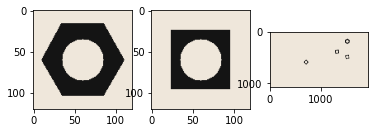

In [2]:
hexnut_template = cv.imread('assets/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('assets/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('assets/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### Q2
2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See [https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

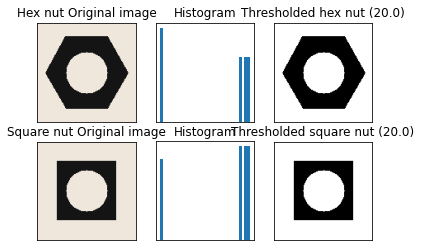

In [46]:
hex_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squ_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
ret_hex, th_hex = cv.threshold(hex_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ret_squ, th_squ = cv.threshold(squ_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

images = [
    hexnut_template, 0, th_hex,
    squarenut_template, 0, th_squ
]

titles = [
    "Hex nut Original image", "Histogram", f"Thresholded hex nut ({ret_hex})",
    "Square nut Original image", "Histogram", f"Thresholded square nut ({ret_squ})",
]

for i in range(2):
    plt.subplot(2,3,i*3+1), plt.imshow(cv.cvtColor(images[i*3], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(2,3,i*3+2), plt.hist(images[i*3].ravel(), 35)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(2,3,i*3+3), plt.imshow(cv.cvtColor(images[i*3+2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])


### Q3
3. Carry out morphological closing to remove small holes inside the foreground. Use a `3×3` kernel. See [https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html) for a guide.

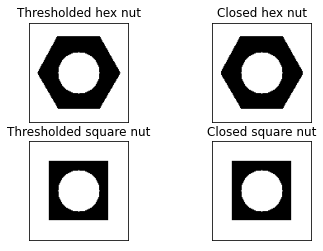

In [47]:
kernel = np.ones((3,3),np.uint8)
closed_hex = cv.morphologyEx(th_hex, cv.MORPH_CLOSE, kernel)
closed_squ = cv.morphologyEx(th_squ, cv.MORPH_CLOSE, kernel)

images = [
    th_hex, closed_hex,
    th_squ, closed_squ
]
titles = [
    "Thresholded hex nut", "Closed hex nut",
    "Thresholded square nut", "Closed square nut"
]

for i in range(2):
    plt.subplot(2,2,i*2+1), plt.imshow(cv.cvtColor(images[i*2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2]), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,i*2+2), plt.imshow(cv.cvtColor(images[i*2+1], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2+1]), plt.xticks([]), plt.yticks([])

### Q4
4. Connected components analysis: apply the connectedComponentsWithStats function (see [https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f](https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f)) and display the outputs as colormapped images. Answer the following questions
* How many connected components are detected in each image?
* What are the statistics? Interpret these statistics.
* What are the centroids?\
For the hexnut template, you should get the object area in pixel as approximately `4728`.

In [48]:

retval_hex, labels_hex, stats_hex, centroids_hex = cv.connectedComponentsWithStats(closed_hex)
retval_squ, labels_squ, stats_squ, centroids_squ = cv.connectedComponentsWithStats(closed_squ)

print(f"Number of components in the hex nut: {retval_hex}")
print(f"Number of components in the square nut: {retval_squ}")

Number of components in the hex nut: 3
Number of components in the square nut: 3


In [49]:
stats_hex

array([[  11,   16,   99,   88, 4722],
       [   0,    0,  120,  120, 7717],
       [  35,   35,   51,   51, 1961]], dtype=int32)

#### Statistics
Statistics are the statistics related to each connected component of the relevant image. All the statistics are given in pixels\
Each stistic array has the following data
1. x position of the leftmost pixel
2. y position of the topmost pixel
3. width
4. height
5. area


#### Centroids
Centroids are the centers of each connected components of the relevant image
$$
x_{label}=\frac{\sum{{pixel.x}\ [where\ pixel.label=label]}}{area}\\
y_{label}=\frac{\sum{{pixel.y}\ [where\ pixel.label=label]}}{area}
$$

### Q5
5. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see [https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html](https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html) for help and [https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) for information.

In [ ]:
contours, hierarchy	=	cv.findContours(image, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)


## Detecting Objects on a Synthetic Conveyor
In this section, we will use the synthetic `conveyor.mp4` sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.

In [ ]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('assets/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

2. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in [https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html](https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html) to match contours in each frame with that in th template.

3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames `conveyor_f100.png` and `conveyor_f101.png`. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [ ]:
# Yor code here.


# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./exports/conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()